In [1]:
import os
import sys
from dotenv import load_dotenv
from pathlib import Path
import json
from IPython.display import Markdown, Image


# Añadimos el directorio raíz del proyecto al path
try:
    # Para scripts .py
    current_file = Path(__file__).resolve()
    project_root = current_file.parent.parent  # Ajusta si tu estructura cambia
except NameError:
    # Para notebooks
    current_file = Path().resolve()
    project_root = current_file.parent  # Ajusta según donde esté tu notebook

# Añadir al sys.path si no está ya
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


from src.back.graphs import (
    ChunkProcessingGraph,
    BusinessLogicRetrievalGraph,
    MdlRetrievalGraph,
    ContextGeneratorGraph,
)

---

## Chunk Processing

In [2]:
chunk_processing_graph = ChunkProcessingGraph()

chunk_processing_graph = chunk_processing_graph.get_compiled_graph()

--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---


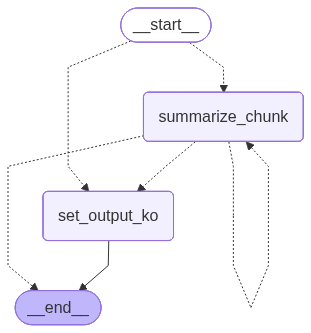

In [3]:
display(Image(chunk_processing_graph.get_graph().draw_mermaid_png()))

In [4]:
doc_txt = """
3. Métricas Clásicas del Retail y su Interpretación

Es crucial entender cómo se miden las diferentes métricas en el contexto de negocio.- Cuando se habla de productos "más vendidos", sin especificar más, generalmente nos referimos a la cantidad de unidades (`order_quantity`) vendidas. También puede ser relevante medir esto por el importe facturado (`sales_amount`) para identificar productos que, aunque se vendan en menor volumen, generan más ingresos. Pero, en este último caso se especificarán términos como "de mayor facturación".
- Cuando se refiere a clientes, tiendas/distribuidores o vendedores que "más compran/venden", esto se mide por el importe facturado (`sales_amount`) o `net sales`. Adicionalmente, se puede considerar la frecuencia de compra (para clientes y distribuidores) o el número de pedidos gestionados (para vendedores) como métricas complementarias.
- Para el análisis de rentabilidad, la métrica clave es el margen bruto (`gross margin`) o el porcentaje de margen bruto (`gross margin percentage`), lo cual permite comprender la contribución real de cada venta o producto a las ganancias, más allá del volumen o ingreso total. Este enfoque es vital para evaluar la eficiencia operativa.
- En el contexto de la gestión de promociones, el éxito no solo se mide por el discount_amount o average_discount_rate, sino también por el incremento en `order_quantity` o `sales_amount` directamente atribuible a la promoción. Es fundamental analizar la rentabilidad general del período promocional para determinar su efectividad.
- Ventas B2C (Business-to-Consumer): Estas ventas se refieren a transacciones directas con el consumidor final. En el modelo, corresponden a los pedidos donde `sale_source` es igual a `'internet_sales'`. Puede identificarse también como la unidad de negocio encargada del comercio minorista.
- Ventas B2B (Business-to-Business): Estas ventas se refieren a transacciones entre empresas, como las realizadas con distribuidores o tiendas minoristas. En el modelo, corresponden a los pedidos donde `sale_source` es igual a `'reseller_sales'`. Puede identificarse también como la unidad de negocio encargada del comercio mayorista.
"""

user_query = 'The name of the product most selled.'

test_chunk = chunk_processing_graph.invoke({
    "user_query": user_query,
    "language": 'English',
    "entity": 'business_logic',
    "chunk_txt": doc_txt, 
})

test_chunk

--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---


{'chunk_summary': ['Synthesized Business Logic\n\n### High-Level Summary\nThe context provides business rules and metrics related to retail sales, including definitions and interpretations of "most sold products" and other related metrics. It specifies how to measure and interpret sales data, including unit sales, revenue, and profitability.\n\n### Detailed Breakdown\n\n#### Definition of "Most Sold Products"\n- The term "most sold products" generally refers to the quantity of units sold (`order_quantity`).\n- Alternatively, it can be measured by the revenue generated (`sales_amount`), which identifies products that generate higher income despite lower sales volume. This is explicitly referred to as "products with the highest revenue" or "de mayor facturación".\n\n#### Related Metrics and Interpretations\n- **Sales Metrics:**\n  - `order_quantity`: Represents the number of units sold.\n  - `sales_amount`: Represents the total revenue generated from sales.\n- **Profitability Metrics:**\

---

## Business Logic

In [5]:
business_logic_graph = BusinessLogicRetrievalGraph()

business_logic_graph = business_logic_graph.get_compiled_graph()

--- BUILDING BUSINESSLOGICRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- BUSINESSLOGICRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---


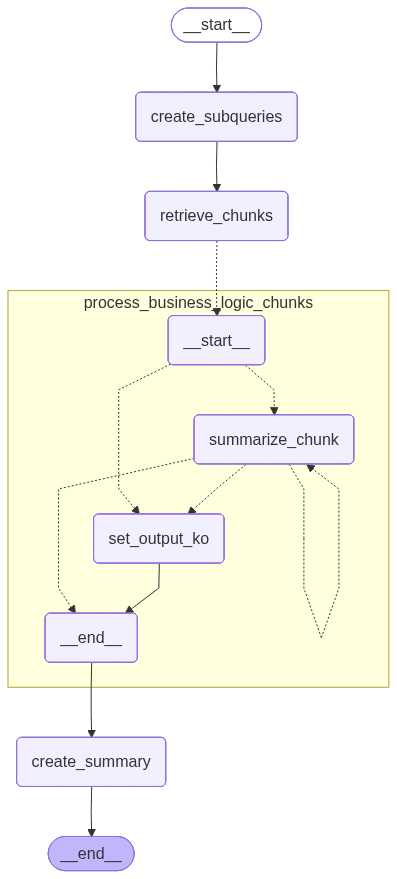

In [6]:
display(Image(business_logic_graph.get_graph(xray=1).draw_mermaid_png()))

In [7]:
user_query = 'Dime las ventas del último trimestre detallas por categorías de producto.'

business_logic_test = business_logic_graph.invoke({
    "user_query": user_query,
    'language': 'Spanish'
})['business_logic']

Markdown(business_logic_test)

--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---
--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GR

### Lógica de Negocio Sintetizada

#### Resumen de Alto Nivel
El contexto proporciona reglas y ejemplos específicos para calcular las ventas del último trimestre y desglosarlas por categorías de producto. Se incluyen definiciones de períodos trimestrales, herramientas SQL para manipulación de fechas, y ejemplos de consultas SQL relevantes.

#### Detalles Específicos

1. **Definición de Trimestre**:
   - Un trimestre es un período de tres meses.
   - Los trimestres en un año natural son:
     - Q1: Enero-Marzo
     - Q2: Abril-Junio
     - Q3: Julio-Septiembre
     - Q4: Octubre-Diciembre.

2. **Uso del Campo `order_date`**:
   - Todas las consultas relacionadas con períodos temporales deben utilizar el campo `order_date` de la tabla `fact_sales`.

3. **Consultas SQL Relevantes**:
   - **Ventas del Trimestre Pasado**:
     ```sql
     SELECT product_key, SUM(sales_amount) AS total_sales
     FROM sales.fact_sales
     WHERE order_date BETWEEN DATE_TRUNC('quarter', CURRENT_DATE - INTERVAL '3 months') AND DATE_TRUNC('quarter', CURRENT_DATE) - INTERVAL '1 day'
     GROUP BY product_key;
     ```
   - Esta consulta calcula las ventas del trimestre anterior y las desglosa por categorías de producto (`product_key`).

4. **Herramientas SQL para Manipulación de Fechas**:
   - `DATE_TRUNC('quarter', date)` para truncar fechas al inicio del trimestre.
   - `INTERVAL` para operaciones de tiempo.

#### Observaciones
El contexto incluye toda la información necesaria para calcular las ventas del último trimestre y desglosarlas por categorías de producto, utilizando el campo `order_date` y agrupando por `product_key`.

---

## MDL

In [8]:
mdl_graph = MdlRetrievalGraph()

mdl_graph = mdl_graph.get_compiled_graph()

--- BUILDING MDLRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- MDLRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---


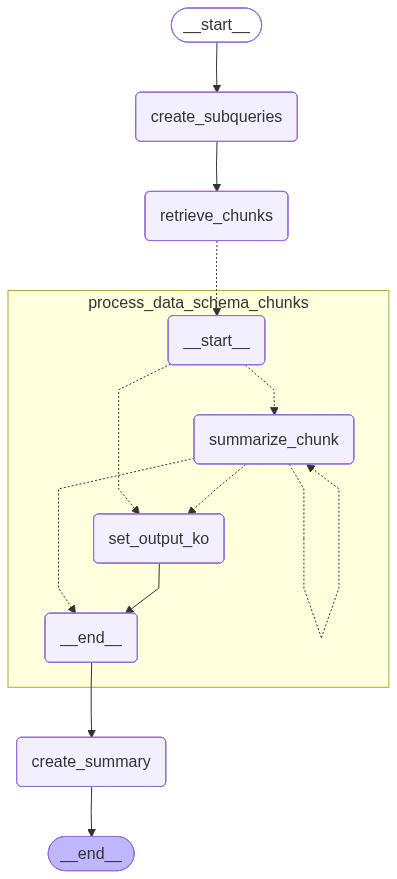

In [9]:
display(Image(mdl_graph.get_graph(xray=1).draw_mermaid_png()))

In [10]:
user_query = 'Dime las ventas del último trimestre detallas por categorías de producto.'

mdl_test = mdl_graph.invoke({
    "user_query": user_query,
    'language': 'Spanish'
})['data_schema']

Markdown(mdl_test)

--- GENERATING MDL SUB-QUERIES 📚 ---
--- MDL RETRIEVE TOOL 🛠️ ---


No relevant docs were retrieved using the relevance score threshold 0.75
No relevant docs were retrieved using the relevance score threshold 0.75
No relevant docs were retrieved using the relevance score threshold 0.75
No relevant docs were retrieved using the relevance score threshold 0.75
No relevant docs were retrieved using the relevance score threshold 0.75


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ------ GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---

--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUN

### Información detallada de tablas y columnas relevantes

#### Base de datos y esquema
- **Base de datos:** adventure_works_dw
- **Esquema:** sales

#### Tabla: dim_product
- **Descripción:** Contiene información detallada de cada producto vendido.
- **Clave primaria:** product_key
- **Columnas relevantes:**
  - **spanish_product_category_name** (VARCHAR(50)): Categoría principal del producto en español. Nunca NULL.
  - **spanish_product_subcategory_name** (VARCHAR(50)): Subcategoría del producto en español. Nunca NULL.
  - **spanish_product_name** (VARCHAR(50)): Nombre del producto en español. Puede ser NULL.
  - **list_price** (NUMERIC): Precio de venta del producto en USD.
  - **start_date** (DATE): Fecha de disponibilidad del producto para la venta.
  - **end_date** (DATE): Fecha de fin de disponibilidad del producto. Puede ser NULL.
  - **active** (BOOL): Indicador de disponibilidad actual del producto.

#### Tabla: fact_sales
- **Descripción:** Contiene detalles de órdenes de ventas entregadas, con granularidad a nivel de línea.
- **Clave primaria:**
  - sales_order_number
  - sales_order_line_number
- **Claves foráneas:**
  - product_key → sales.dim_product.product_key
- **Columnas relevantes:**
  - **order_quantity** (INT2): Cantidad vendida de cada producto.
  - **sales_amount** (NUMERIC): Subtotal en USD de la línea de orden de venta.
  - **order_date** (DATE): Fecha de creación del pedido.
  - **product_key**: Relaciona con `sales.dim_product`.

### Relación entre tablas
- La tabla `fact_sales` se relaciona con `dim_product` mediante la clave foránea `product_key`.
- Condición de unión: `fact_sales.product_key = dim_product.product_key`.

### Condiciones para el cálculo del último trimestre
- Filtrar las ventas en `fact_sales` utilizando la columna `order_date` para el último trimestre.
- Relacionar con `dim_product` para obtener las categorías de producto mediante `spanish_product_category_name`.

---

## GLOBAL

In [2]:
context_generator_graph = ContextGeneratorGraph()

context_generator_graph = context_generator_graph.get_compiled_graph()

--- BUILDING CONTEXT GENERATOR GRAPH 🏗️ ---
--- BUILDING BUSINESSLOGICRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- BUSINESSLOGICRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---
--- BUILDING MDLRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- MDLRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---
--- CONTEXT GENERATOR COMPILED SUCCESSFULLY ✅ ---


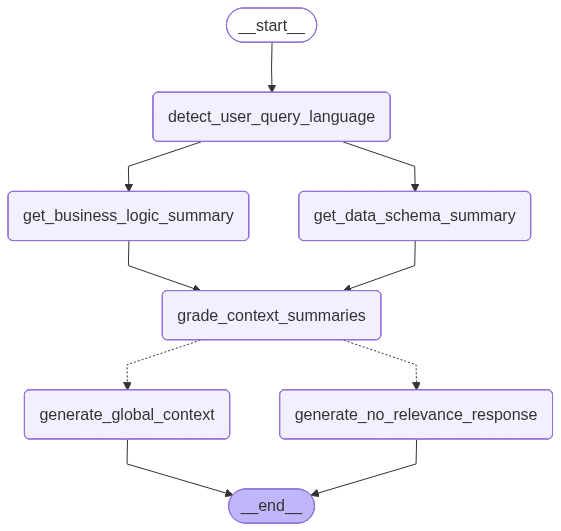

In [3]:
display(Image(context_generator_graph.get_graph().draw_mermaid_png()))

In [4]:
user_query = 'Dime las ventas del último trimestre detallas por categorías de producto.'

global_context_test = context_generator_graph.invoke({
    "user_query": user_query
})

global_context_test

--- DEFINE USER QUERY LANGUAGE 🔣 ---
--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- GENERATING MDL SUB-QUERIES 📚 ---
--- MDL RETRIEVE TOOL 🛠️ ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---


No relevant docs were retrieved using the relevance score threshold 0.75


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVA

No relevant docs were retrieved using the relevance score threshold 0.75


--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---


No relevant docs were retrieved using the relevance score threshold 0.75


--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---


No relevant docs were retrieved using the relevance score threshold 0.75


--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- SUMMARIZE BUSINES LOGIC 📝👨‍💼 ---


No relevant docs were retrieved using the relevance score threshold 0.75


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT 

{'language': 'Spanish',
 'relevant_context': True,
 'context': "### Resumen General\nEl objetivo es calcular las ventas del último trimestre, desglosadas por categorías de producto. Esto implica utilizar datos de ventas y productos, aplicando filtros temporales y uniendo tablas relevantes para obtener las categorías de producto y sus ventas asociadas.\n\n### Esquema Detallado y Relaciones\n#### Base de datos y esquema\n- **Base de datos:** adventure_works_dw\n- **Esquema:** sales\n\n#### Tabla: dim_product\n- **Descripción:** Contiene información detallada de productos, incluyendo categorías y precios.\n- **Clave primaria:** product_key\n- **Columnas relevantes:**\n  - **spanish_product_category_name** (VARCHAR(50), NOT NULL): Categoría principal del producto en español.\n  - **spanish_product_subcategory_name** (VARCHAR(50), NOT NULL): Subcategoría del producto en español.\n  - **spanish_product_name** (VARCHAR(50), NULL): Nombre del producto en español.\n  - **list_price** (NUMERIC):

In [5]:
Markdown(global_context_test['context'])

### Resumen General
El objetivo es calcular las ventas del último trimestre, desglosadas por categorías de producto. Esto implica utilizar datos de ventas y productos, aplicando filtros temporales y uniendo tablas relevantes para obtener las categorías de producto y sus ventas asociadas.

### Esquema Detallado y Relaciones
#### Base de datos y esquema
- **Base de datos:** adventure_works_dw
- **Esquema:** sales

#### Tabla: dim_product
- **Descripción:** Contiene información detallada de productos, incluyendo categorías y precios.
- **Clave primaria:** product_key
- **Columnas relevantes:**
  - **spanish_product_category_name** (VARCHAR(50), NOT NULL): Categoría principal del producto en español.
  - **spanish_product_subcategory_name** (VARCHAR(50), NOT NULL): Subcategoría del producto en español.
  - **spanish_product_name** (VARCHAR(50), NULL): Nombre del producto en español.
  - **list_price** (NUMERIC): Precio de venta del producto en USD.
  - **start_date** (DATE): Fecha de disponibilidad del producto para la venta.
  - **end_date** (DATE, NULL): Fecha de fin de disponibilidad del producto.

#### Tabla: fact_sales
- **Descripción:** Contiene detalles de órdenes de ventas con granularidad a nivel de línea.
- **Clave primaria:**
  - sales_order_number
  - sales_order_line_number
- **Claves foráneas:**
  - product_key → sales.dim_product.product_key
- **Columnas relevantes:**
  - **order_date** (DATE): Fecha de creación del pedido.
  - **sales_amount** (NUMERIC): Subtotal en USD de la línea de orden de venta.
  - **order_quantity** (INT2): Cantidad vendida de cada producto.
  - **product_key**: Referencia a la tabla `sales.dim_product`.

#### Relaciones entre tablas
- Para obtener las categorías de producto y sus ventas, se debe realizar un JOIN entre `fact_sales` y `dim_product` utilizando la clave foránea `product_key`:
  ```sql
  ON fact_sales.product_key = dim_product.product_key
  ```
- Para filtrar las ventas del último trimestre, se debe aplicar un filtro en la columna `order_date` con el rango de fechas correspondiente.

### Reglas de Negocio y Lógica
1. **Definición de Trimestre:**
   - Un trimestre es un período de tres meses.
   - Los trimestres en un año natural son:
     - Q1: Enero a Marzo.
     - Q2: Abril a Junio.
     - Q3: Julio a Septiembre.
     - Q4: Octubre a Diciembre.

2. **Filtro Temporal:**
   - Para calcular las ventas del último trimestre, se utiliza el campo `order_date` de la tabla `fact_sales` con el siguiente rango de fechas:
     ```sql
     WHERE order_date BETWEEN DATE_TRUNC('quarter', CURRENT_DATE - INTERVAL '3 months') AND DATE_TRUNC('quarter', CURRENT_DATE) - INTERVAL '1 day'
     ```

3. **Cálculo de Ventas:**
   - Las ventas totales se calculan sumando el campo `sales_amount`.

4. **Representación de Categorías de Producto:**
   - Se prioriza el uso del campo `spanish_product_category_name` de la tabla `dim_product`. Si este es nulo, se puede usar un campo alternativo como `english_product_category_name`.

5. **Consulta SQL Representativa:**
   - Una consulta representativa para obtener las ventas del último trimestre desglosadas por categorías de producto sería:
     ```sql
     SELECT 
         COALESCE(spanish_product_category_name, 'Categoría no registrada') AS categoria_producto,
         SUM(sales_amount) AS ventas_totales
     FROM 
         sales.fact_sales
     JOIN 
         sales.dim_product
     ON 
         fact_sales.product_key = dim_product.product_key
     WHERE 
         order_date BETWEEN DATE_TRUNC('quarter', CURRENT_DATE - INTERVAL '3 months') AND DATE_TRUNC('quarter', CURRENT_DATE) - INTERVAL '1 day'
     GROUP BY 
         spanish_product_category_name;
     ```

In [6]:
user_query = 'Dime los 10 clientes que más han comprado el mes pasado.'

global_context_test = context_generator_graph.invoke({
    "user_query": user_query
})

global_context_test

--- DEFINE USER QUERY LANGUAGE 🔣 ---
--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- GENERATING MDL SUB-QUERIES 📚 ---
--- MDL RETRIEVE TOOL 🛠️ ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---


No relevant docs were retrieved using the relevance score threshold 0.75


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRI

No relevant docs were retrieved using the relevance score threshold 0.75


--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---


No relevant docs were retrieved using the relevance score threshold 0.75


--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS NOT GROUNDED (HALLUCINATIONS) 👻❌ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---


No relevant docs were retrieved using the relevance score threshold 0.75


--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---


No relevant docs were retrieved using the relevance score threshold 0.75


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRI

{'language': 'Spanish',
 'relevant_context': True,
 'context': "### Resumen General\nEl objetivo es identificar los 10 clientes que más han comprado durante el mes pasado, considerando únicamente las ventas realizadas en línea (B2C). Esto implica calcular el volumen total de ventas por cliente, filtrando las transacciones por el mes anterior y ordenando los resultados en orden descendente según el importe total de ventas.\n\n### Esquema Detallado y Relaciones\n#### Base de datos y esquema\n- **Base de datos:** adventure_works_dw\n- **Esquema:** sales\n\n#### Tabla: dim_customer\n- **Descripción:** Contiene información detallada de clientes que han realizado compras en línea en el segmento minorista (B2C).\n- **Clave primaria:** customer_key\n- **Columnas relevantes:**\n  1. **customer_full_name**: Tipo de dato: TEXT, Descripción: Nombre/s y apellido/s del cliente.\n\n#### Tabla: fact_sales\n- **Descripción:** Contiene el detalle de las órdenes de ventas entregadas, con granularidad a n

In [7]:
Markdown(global_context_test['context'])

### Resumen General
El objetivo es identificar los 10 clientes que más han comprado durante el mes pasado, considerando únicamente las ventas realizadas en línea (B2C). Esto implica calcular el volumen total de ventas por cliente, filtrando las transacciones por el mes anterior y ordenando los resultados en orden descendente según el importe total de ventas.

### Esquema Detallado y Relaciones
#### Base de datos y esquema
- **Base de datos:** adventure_works_dw
- **Esquema:** sales

#### Tabla: dim_customer
- **Descripción:** Contiene información detallada de clientes que han realizado compras en línea en el segmento minorista (B2C).
- **Clave primaria:** customer_key
- **Columnas relevantes:**
  1. **customer_full_name**: Tipo de dato: TEXT, Descripción: Nombre/s y apellido/s del cliente.

#### Tabla: fact_sales
- **Descripción:** Contiene el detalle de las órdenes de ventas entregadas, con granularidad a nivel de línea.
- **Clave primaria:** sales_order_number, sales_order_line_number
- **Claves foráneas:** customer_key (referencia a sales.dim_customer.customer_key)
- **Columnas relevantes:**
  1. **order_date**: Tipo de dato: DATE, Descripción: Fecha en la que el pedido fue creado.
  2. **sales_amount**: Tipo de dato: NUMERIC, Descripción: Subtotal en USD de la línea de orden de venta.
  3. **customer_key**: Tipo de dato: Referencia a sales.dim_customer.customer_key, Descripción: Identificador del cliente asociado a la orden de venta.

#### Relaciones entre tablas
- La tabla `fact_sales` se relaciona con la tabla `dim_customer` mediante la clave foránea `customer_key`.
- Para calcular el total de compras por cliente: Usar la columna `sales_amount` y agrupar por `customer_key`.
- Para filtrar las ventas del mes pasado: Usar la columna `order_date` con una condición de rango de fechas.

### Reglas de Negocio y Lógica
1. **Cálculo del Volumen de Ventas por Cliente:**
   - El volumen de ventas por cliente se define como la suma del campo `sales_amount` agrupado por la clave del cliente (`customer_key`).
   - Ejemplo de cálculo:
     ```sql
     SELECT
         fs.customer_key,
         dc.customer_full_name AS cliente,
         SUM(fs.sales_amount) AS importe_ventas_por_cliente
     FROM sales.fact_sales fs
     JOIN sales.dim_customer dc ON fs.customer_key = dc.customer_key
     WHERE fs.sale_source = 'internet_sales'
     GROUP BY fs.customer_key, dc.customer_full_name
     ORDER BY importe_ventas_por_cliente DESC;
     ```

2. **Filtro Temporal para el Mes Pasado:**
   - Para limitar las ventas al mes anterior, se debe incluir una condición en la cláusula `WHERE` que utilice la columna `order_date`. Ejemplo de filtro temporal:
     ```sql
     WHERE fs.order_date >= DATEADD(MONTH, -1, DATEFROMPARTS(YEAR(GETDATE()), MONTH(GETDATE()), 1))
       AND fs.order_date < DATEFROMPARTS(YEAR(GETDATE()), MONTH(GETDATE()), 1)
     ```

3. **Orden y Límite:**
   - Los resultados deben ordenarse en orden descendente según el importe total de ventas (`importe_ventas_por_cliente`).
   - Se deben limitar los resultados a los 10 primeros clientes utilizando `TOP 10` o `LIMIT 10` dependiendo del sistema SQL.

In [8]:
user_query = 'Dime el departamento con el salario medio más alto.'

global_context_test = context_generator_graph.invoke({
    "user_query": user_query
})

global_context_test

--- DEFINE USER QUERY LANGUAGE 🔣 ---
--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- GENERATING MDL SUB-QUERIES 📚 ---
--- MDL RETRIEVE TOOL 🛠️ ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---
--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUN

No relevant docs were retrieved using the relevance score threshold 0.75
No relevant docs were retrieved using the relevance score threshold 0.75
No relevant docs were retrieved using the relevance score threshold 0.75
No relevant docs were retrieved using the relevance score threshold 0.75
No relevant docs were retrieved using the relevance score threshold 0.75


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️

{'language': 'Spanish',
 'relevant_context': False,
 'no_relevant_context_msg': 'Lo siento mucho, pero no puedo responder a tu pregunta sobre el departamento con el salario medio más alto, ya que este tema está fuera del alcance de la información proporcionada. Sin embargo, puedo ayudarte con temas relacionados con el análisis de ventas, como el cálculo del volumen de ventas por agente comercial o el valor promedio por orden. Por favor, dime cómo puedo asistirte.'}

In [9]:
Markdown(global_context_test['no_relevant_context_msg'])

Lo siento mucho, pero no puedo responder a tu pregunta sobre el departamento con el salario medio más alto, ya que este tema está fuera del alcance de la información proporcionada. Sin embargo, puedo ayudarte con temas relacionados con el análisis de ventas, como el cálculo del volumen de ventas por agente comercial o el valor promedio por orden. Por favor, dime cómo puedo asistirte.